<a href="https://colab.research.google.com/github/aslesha96/663-Data-analytics-applications/blob/main/Predict_Calorie_Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/datasets/calories_kaggle/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/datasets/calories_kaggle/test.csv")

In [3]:
train_data.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.nunique()


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
train_data.describe()

id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

In [6]:
train_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
train_data.nunique()

id            750000
Sex                2
Age               60
Height            86
Weight            91
Duration          30
Heart_Rate        63
Body_Temp         75
Calories         277
dtype: int64

<Axes: xlabel='Age'>

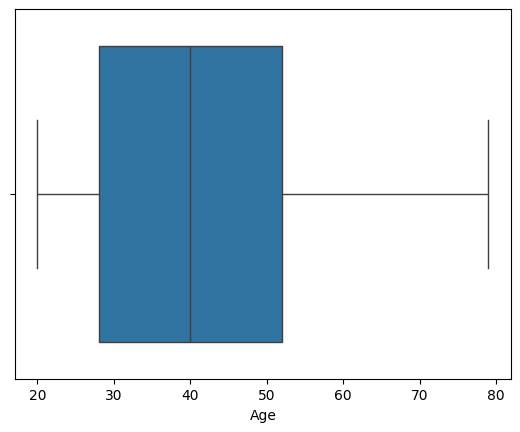

In [9]:
sns.boxplot(x=train_data['Age'])

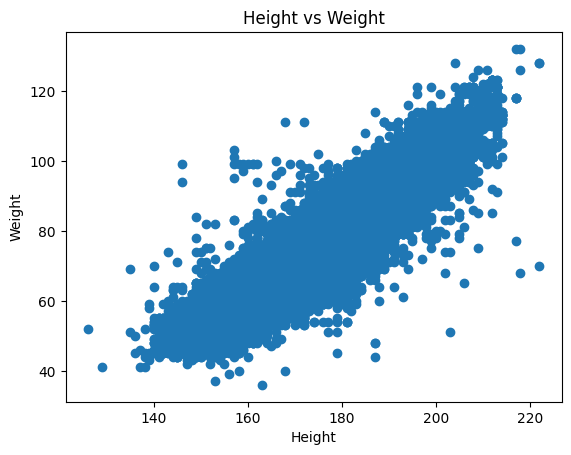

In [10]:
plt.scatter(train_data['Height'], train_data['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

<Axes: ylabel='Count'>

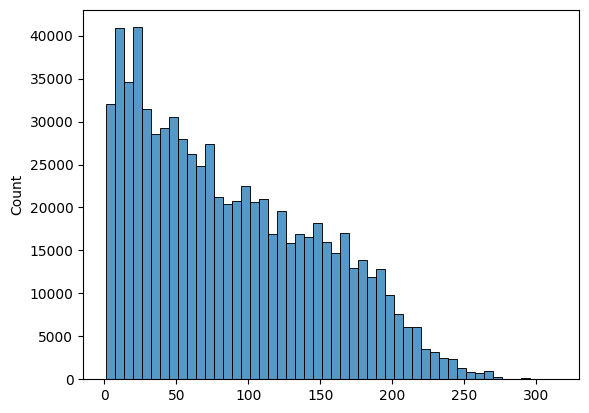

In [11]:
calories = train_data.Calories.values
sns.histplot(calories, bins = 50)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Body_Temp'}>],
       [<Axes: title={'center': 'Calories'}>, <Axes: >, <Axes: >]],
      dtype=object)

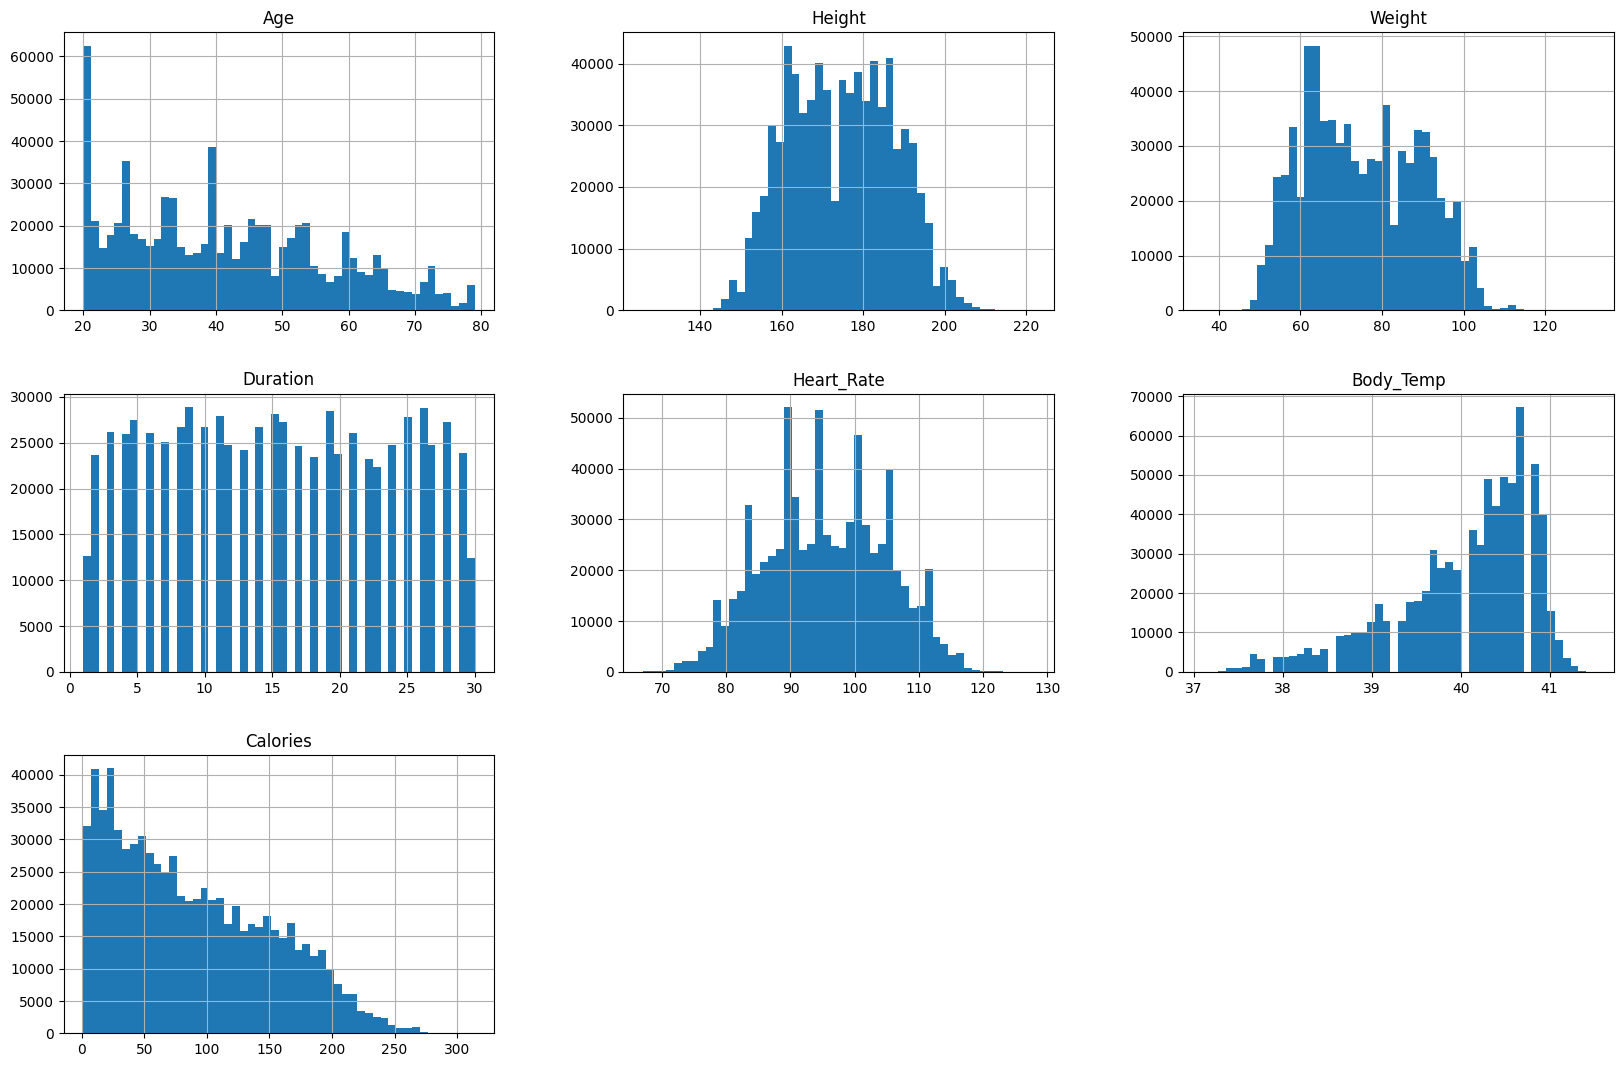

In [12]:
import matplotlib as plt
train_data.drop(columns='id').hist(bins=50, figsize=(20,13))

In [13]:
Q1 = np.percentile(calories, 25)
Q3 = np.percentile(calories, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in calories if x < lower_bound or x > upper_bound]
print("Number of outliers: ", len(outliers))

Number of outliers:  139


In [14]:
train_data['Sex'].value_counts()


Sex
female    375721
male      374279
Name: count, dtype: int64

In [15]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data.head()


id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    0   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1    1   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2    1   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    0   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4    1   38   166.0    61.0      25.0       102.0       40.6     146.0

In [16]:
train_data = train_data.drop('id', axis=1)
train_data.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    0   36   189.0    82.0      26.0       101.0       41.0     150.0
1    1   64   163.0    60.0       8.0        85.0       39.7      34.0
2    1   51   161.0    64.0       7.0        84.0       39.8      29.0
3    0   20   192.0    90.0      25.0       105.0       40.7     140.0
4    1   38   166.0    61.0      25.0       102.0       40.6     146.0

In [17]:
train_data.describe()

Sex            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean        0.500961      41.420404     174.697685      75.145668   
std         0.499999      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%         0.000000      28.000000     164.000000      63.000000   
50%         1.000000      40.000000     174.000000      74.000000   
75%         1.000000      52.000000     185.000000      87.000000   
max         1.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

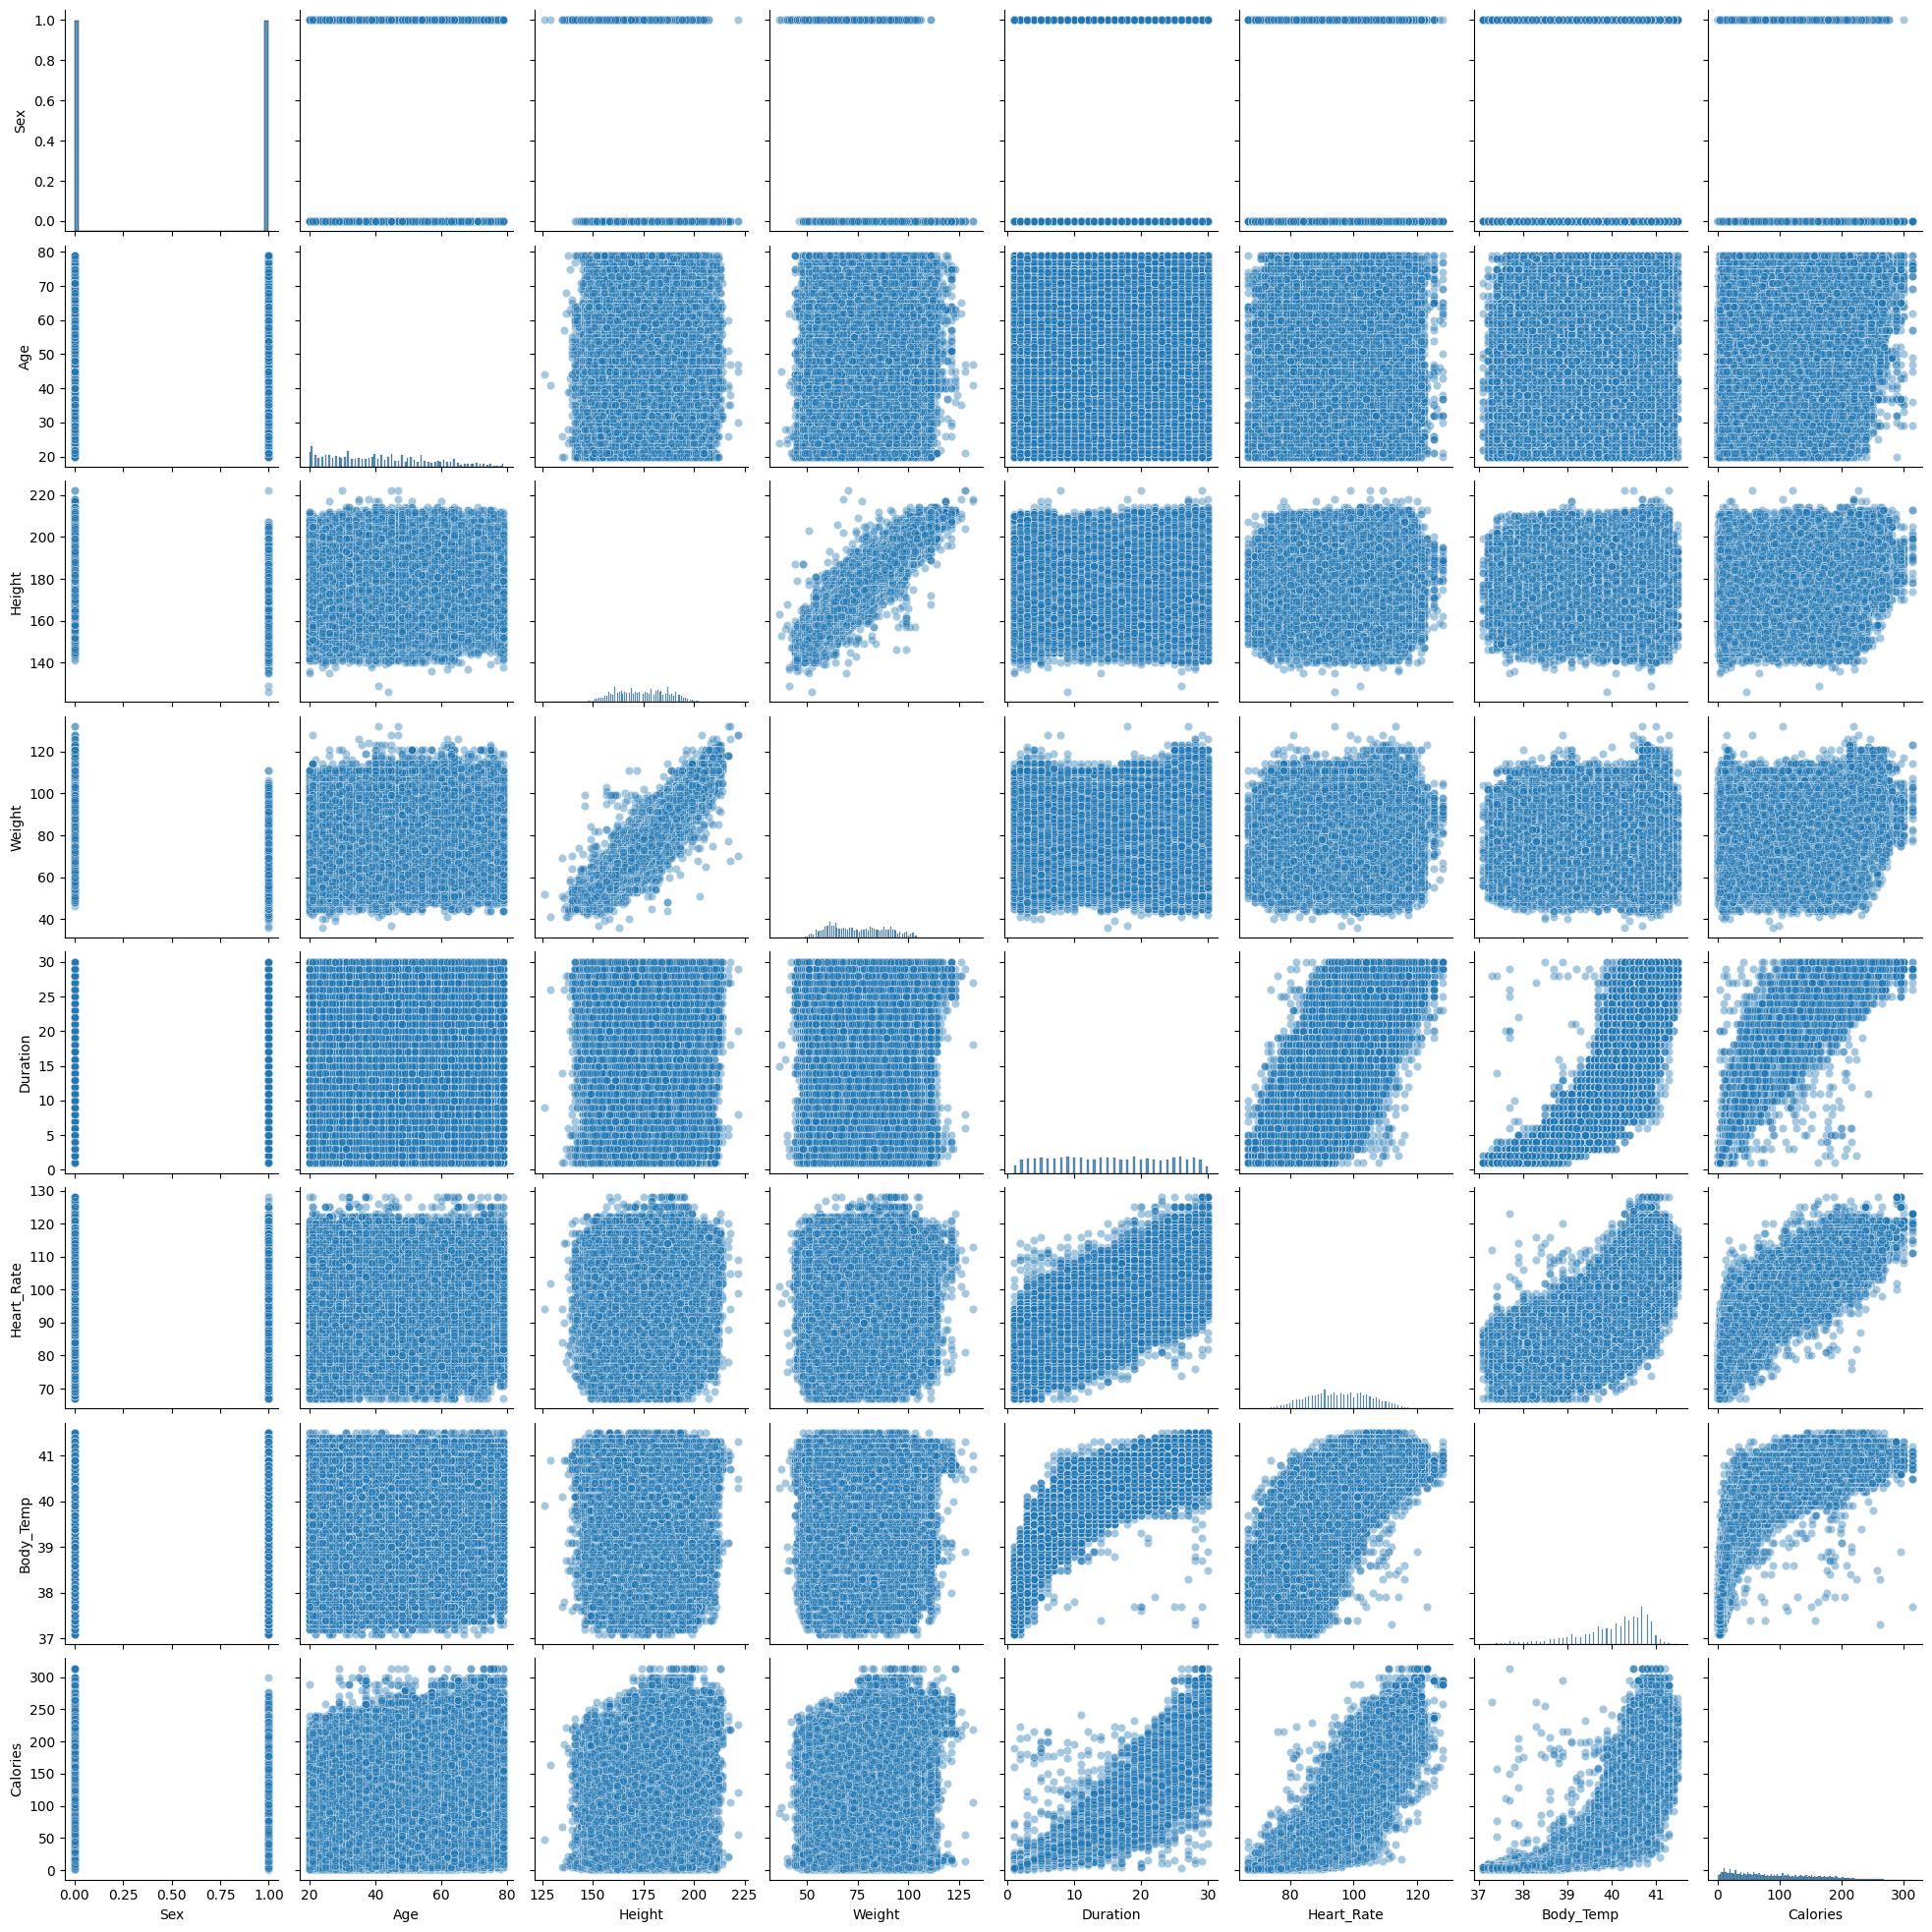

In [18]:
sns.pairplot(train_data, kind='scatter',plot_kws={'alpha':0.4})

<Axes: >

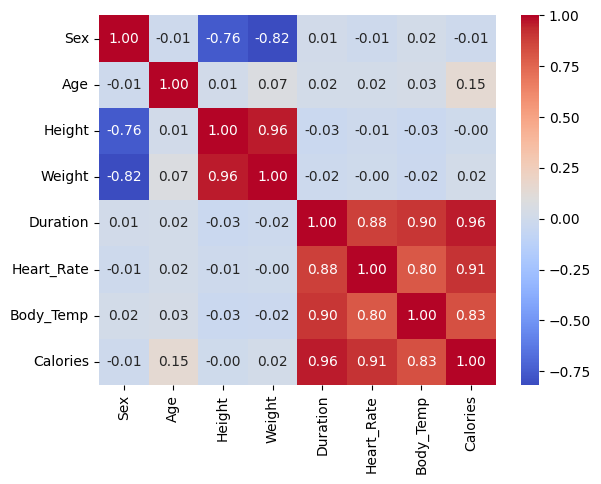

In [19]:
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


In [20]:
#train_data['BMI'] = train_data['Weight'] / ((train_data['Height']/100) ** 2)  # Height in cm
train_data.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    0   36   189.0    82.0      26.0       101.0       41.0     150.0
1    1   64   163.0    60.0       8.0        85.0       39.7      34.0
2    1   51   161.0    64.0       7.0        84.0       39.8      29.0
3    0   20   192.0    90.0      25.0       105.0       40.7     140.0
4    1   38   166.0    61.0      25.0       102.0       40.6     146.0

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
x = train_data.drop('Calories', axis=1)
y = train_data['Calories']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((600000, 7), (150000, 7), (600000,), (150000,))

In [25]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [26]:
lm.coef_

array([  1.68800643,   0.53231673,  -0.14674364,   0.26990701,
         6.75904438,   1.95115911, -18.1991234 ])

In [27]:
predictions = lm.predict(x_test)
predictions

array([197.08686251,  67.31936343,  41.13220736, ...,  44.47120989,
        27.6725451 , 166.11530054])

<Axes: ylabel='Calories'>

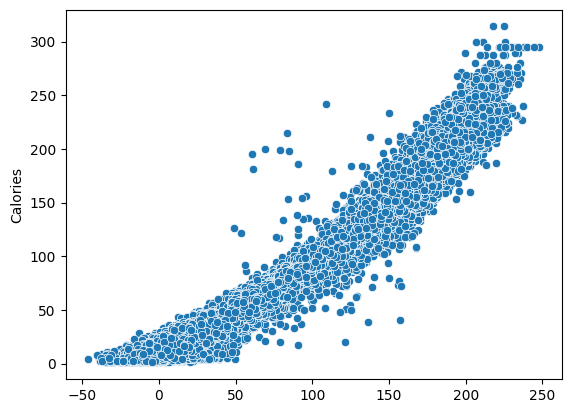

In [28]:
sns.scatterplot(x=predictions, y=y_test)

In [29]:
print("R2 score: ", r2_score(y_test, predictions))

R2 score:  0.9684446417027912


In [30]:
print("MSE: ", mean_squared_error(y_test, predictions))

MSE:  122.29644012556788


In [31]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE:  11.058772089412454


<Axes: ylabel='Calories'>

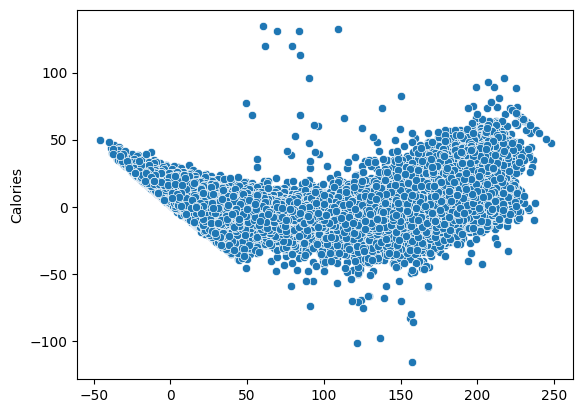

In [32]:
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)

In [33]:
residuals

404846    2.913137
580313   -3.319363
552086   -2.132207
370876   -0.526717
239330   -5.475119
            ...   
235496    6.720484
372040    1.351548
695665   -9.471210
386092    9.327455
549832    0.884699
Name: Calories, Length: 150000, dtype: float64

In [39]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squaredlogerror',
    tree_method='hist',       # Use histogram-based algorithm
    device='cuda',            # Use GPU explicitly
    random_state=42,
    verbosity=0)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

In [40]:
model.score(x_train, y_train)

0.9918658694064193

In [45]:
y_train.head()

453635     25.0
11651      67.0
431999     86.0
529211      5.0
110925    122.0
Name: Calories, dtype: float64

In [48]:
predictions_2 = model.predict(x_test)
predictions_2

array([200.42438 ,  64.49103 ,  40.827366, ...,  35.820343,  37.14679 ,
       166.09366 ], dtype=float32)

In [49]:
print("R2 score: ", r2_score(y_test, predictions_2))
print("MSE: ", mean_squared_error(y_test, predictions_2))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions_2)))

R2 score:  0.9920684959639456
MSE:  30.739461086608003
RMSE:  5.544317909951413


Text(0.5, 1.0, 'XGBoost: Actual vs Predicted')

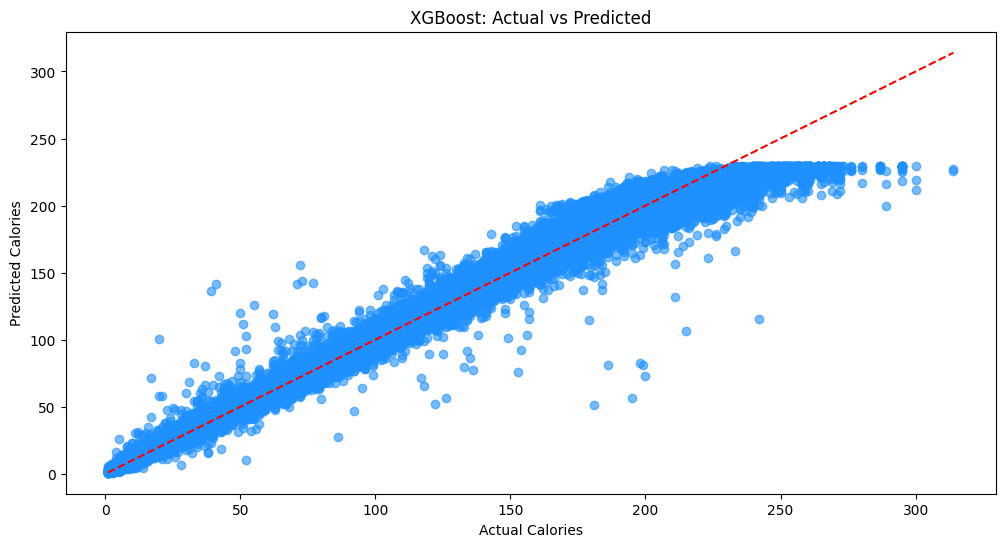

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions_2, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('XGBoost: Actual vs Predicted')

In [61]:
test_data.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5

In [70]:
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data.head()

id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    0   45   177.0    81.0       7.0        87.0       39.8
1  750001    0   26   200.0    97.0      20.0       101.0       40.5
2  750002    1   29   188.0    85.0      16.0       102.0       40.4
3  750003    1   39   172.0    73.0      20.0       107.0       40.6
4  750004    1   30   173.0    67.0      16.0        94.0       40.5

In [72]:
new_data = test_data.drop('id', axis=1)
new_data.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0    0   45   177.0    81.0       7.0        87.0       39.8
1    0   26   200.0    97.0      20.0       101.0       40.5
2    1   29   188.0    85.0      16.0       102.0       40.4
3    1   39   172.0    73.0      20.0       107.0       40.6
4    1   30   173.0    67.0      16.0        94.0       40.5

In [73]:
y_finalxg = model.predict(new_data)
y_finalxg = [round(val, 3) for val in y_finalxg]

In [74]:
final=pd.DataFrame({
    'id':test_data['id'],
    'Calories':y_finalxg
})

In [75]:
final.head()

id    Calories
0  750000   26.704000
1  750001  106.902000
2  750002   86.353996
3  750003  125.046997
4  750004   74.916000

In [76]:
final.to_csv('mysubmission.csv',index=False)
